In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('youtubers_df.csv')

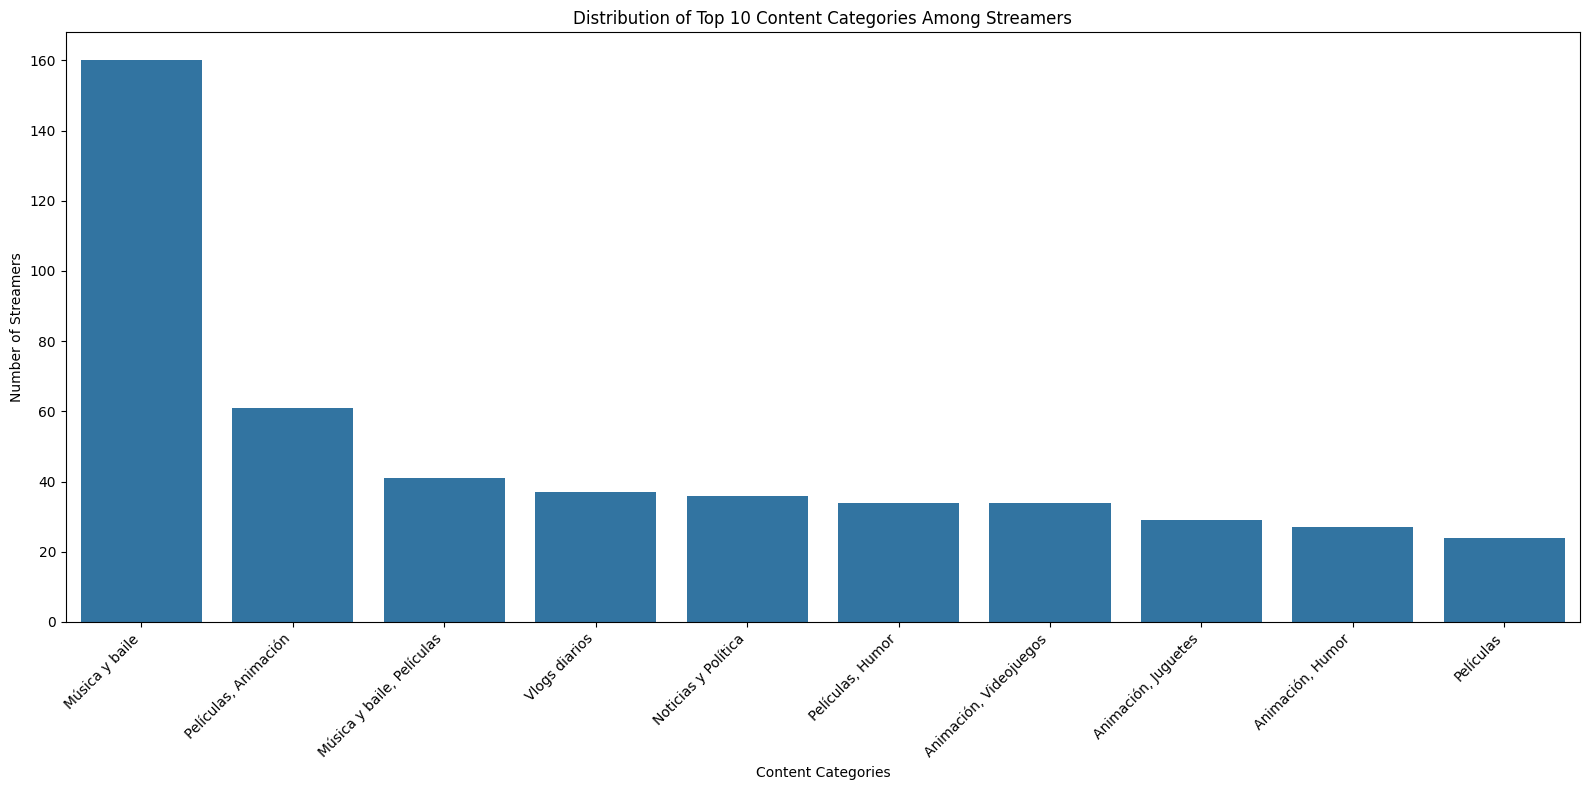

In [3]:
# Identifying trend among top Youtube streamers. Which categories are most popular (Top 10)?
top_categories = df['Categories'].value_counts().nlargest(10).index
plt.figure(figsize=(16, 8))
sns.countplot(x='Categories', data=df, order=top_categories)
plt.title('Distribution of Top 10 Content Categories Among Streamers')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [4]:
# Calculate the correlation matrix
correlation_matrix = df[['Subscribers', 'Likes', 'Comments']].corr()
correlation_matrix

,Subscribers,Likes,Comments
Subscribers,1.000000,0.211639,0.036350
Likes,0.211639,1.000000,0.325911
Comments,0.036350,0.325911,1.000000


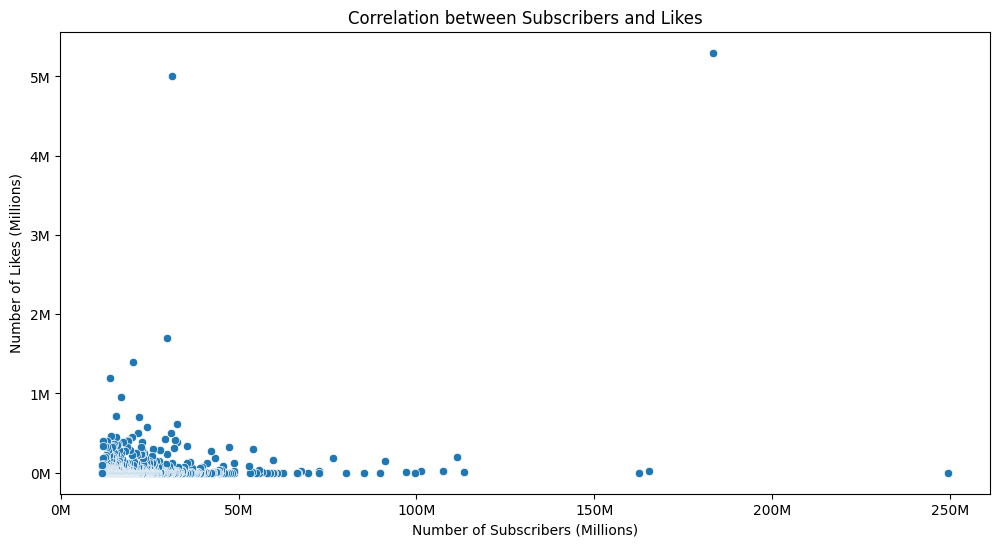

In [5]:
# Correlation between Subscribers and Likes
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='Subscribers', y='Likes', data=df)
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Correlation between Subscribers and Likes')
plt.xlabel('Number of Subscribers (Millions)')
plt.ylabel('Number of Likes (Millions)')
plt.show()

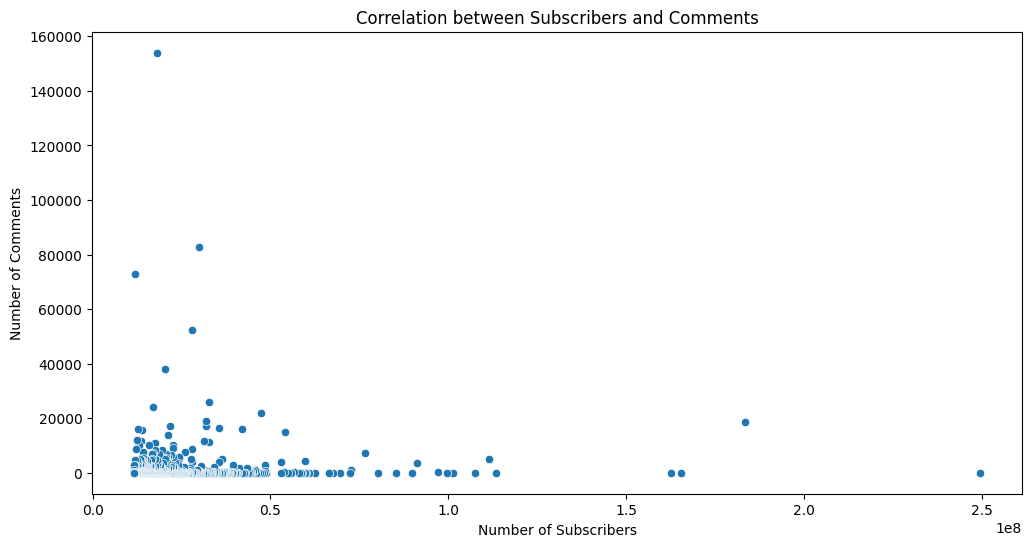

In [6]:
# Correlation between Subscribers and Comments
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Subscribers', y='Comments', data=df)
plt.title('Correlation between Subscribers and Comments')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Comments')
plt.show()

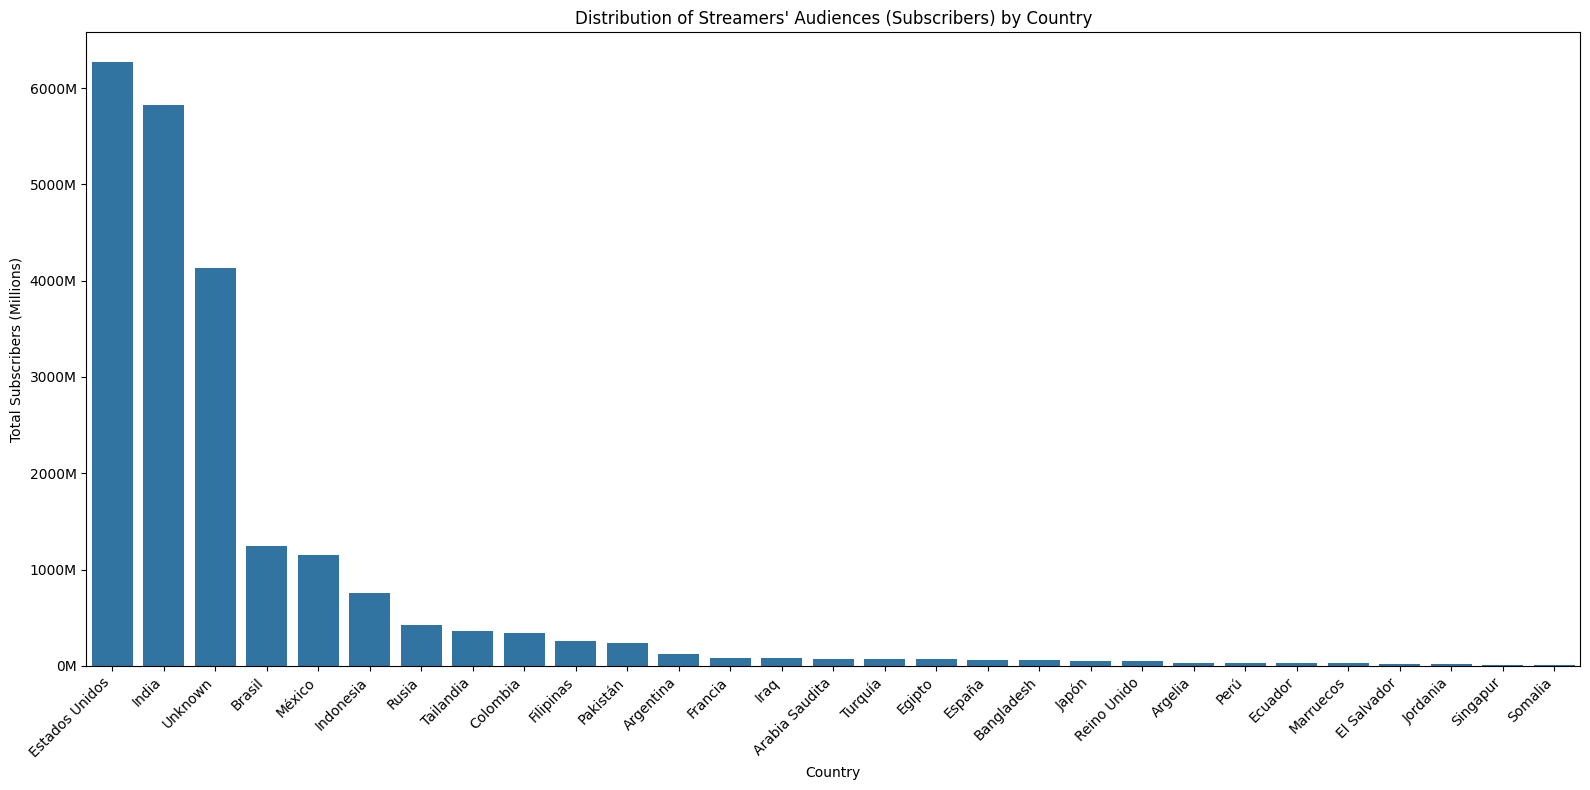

In [7]:
# Calculate the total subscribers for each country
total_subscribers_by_country = df.groupby('Country')['Subscribers'].sum().reset_index()

# Sort the DataFrame by total subscribers in descending order
total_subscribers_by_country = total_subscribers_by_country.sort_values(by='Subscribers', ascending=False)

# Plot the distribution of streamers' audiences by country (using 'Subscribers')
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Country', y='Subscribers', data=total_subscribers_by_country)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Distribution of Streamers\' Audiences (Subscribers) by Country')
plt.xlabel('Country')
plt.ylabel('Total Subscribers (Millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

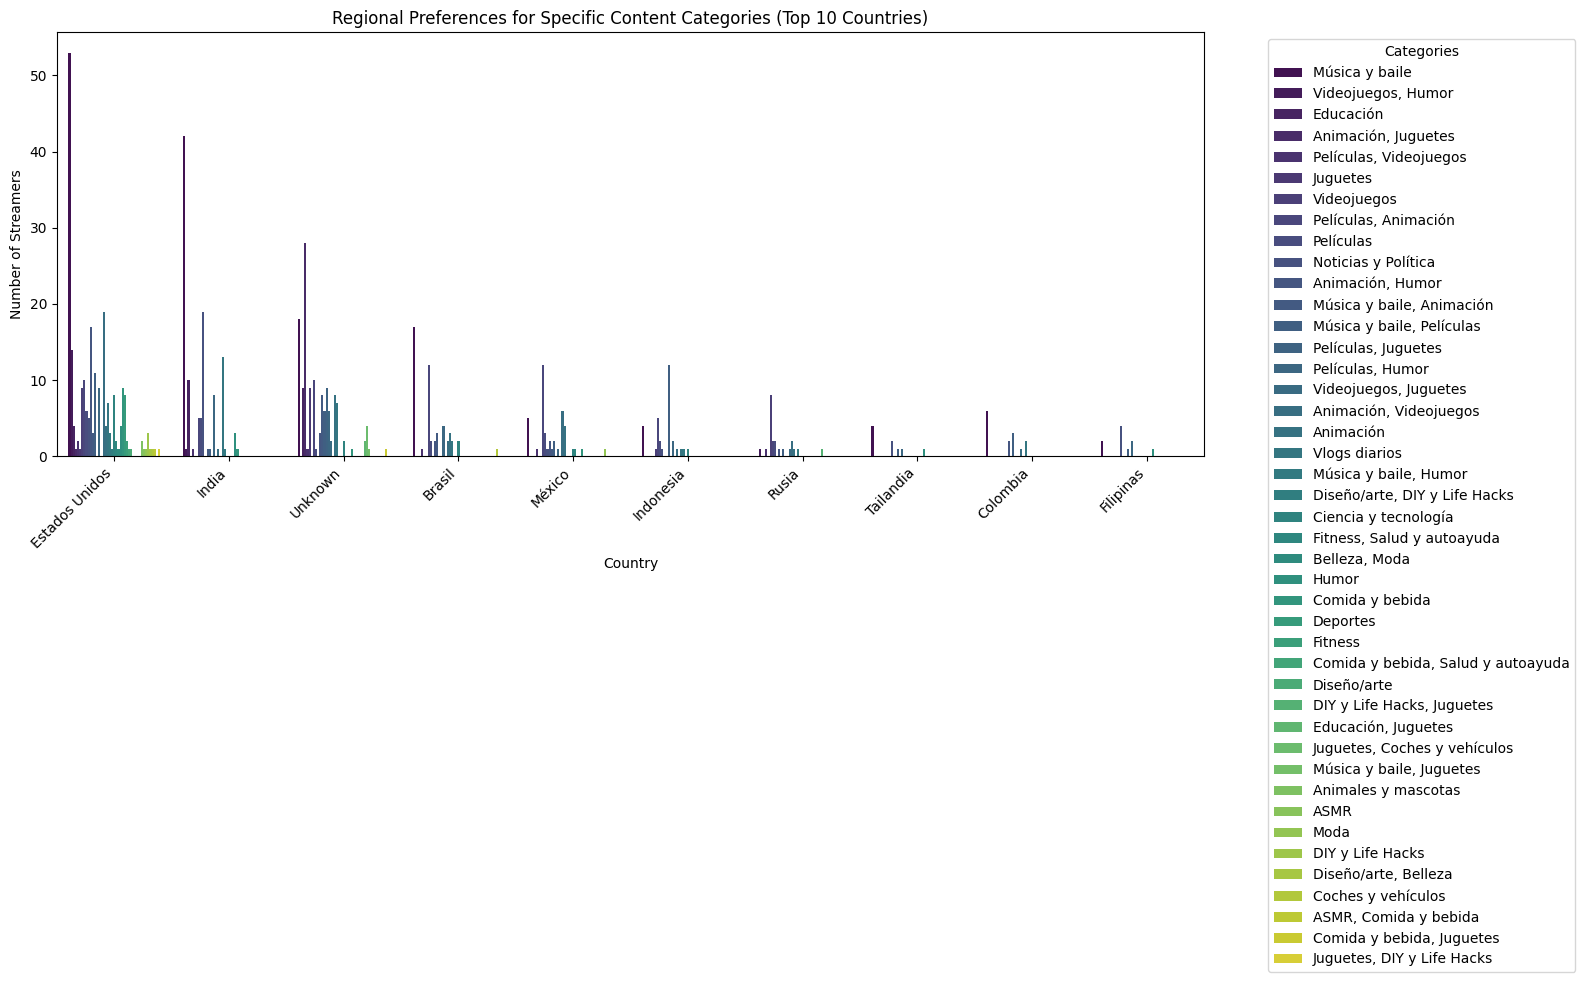

In [8]:
# Regional prefences for specific content categories
# Calculate the total subscribers for each country
total_subscribers_by_country = df.groupby('Country')['Subscribers'].sum().reset_index()

# Sort the DataFrame by total subscribers in descending order
total_subscribers_by_country = total_subscribers_by_country.sort_values(by='Subscribers', ascending=False)

# Select the top 10 countries
top_countries = total_subscribers_by_country['Country'].head(10)

# Filter the DataFrame for the top countries
filtered_df = df[df['Country'].isin(top_countries)]

# Plot the regional preferences for specific content categories in the top 10 countries
plt.figure(figsize=(16, 8))
sns.countplot(x='Country', hue='Categories', data=filtered_df, palette='viridis', order=top_countries)
plt.title('Regional Preferences for Specific Content Categories (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [9]:
# Calculate the average values in thousands with 'k' notation
average_values_thousands = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean() / 1e3  # Dividing by 1e3 to convert to thousands

# Format the values with 'k'
average_values_thousands_formatted = average_values_thousands.apply(lambda x: f'{x:.2f}k')

average_values_thousands_formatted

Subscribers    21894.40k
Visits          1209.45k
Likes             53.63k
Comments           1.29k
dtype: object

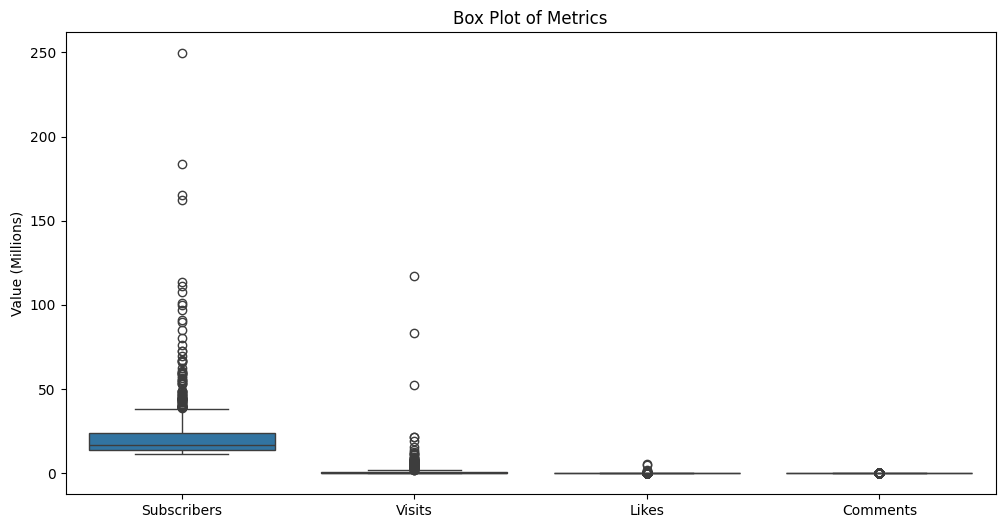

In [20]:
# Visualization of the performance metrics average values

# Calculate the average values
average_values_millions = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean() / 1e6  # Dividing by 1e6 to convert to millions

# Create a DataFrame for box plot
boxplot_data = df[['Subscribers', 'Visits', 'Likes', 'Comments']] / 1e6 

# Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=boxplot_data)
plt.title('Box Plot of Metrics')
plt.ylabel('Value (Millions)')
plt.show()

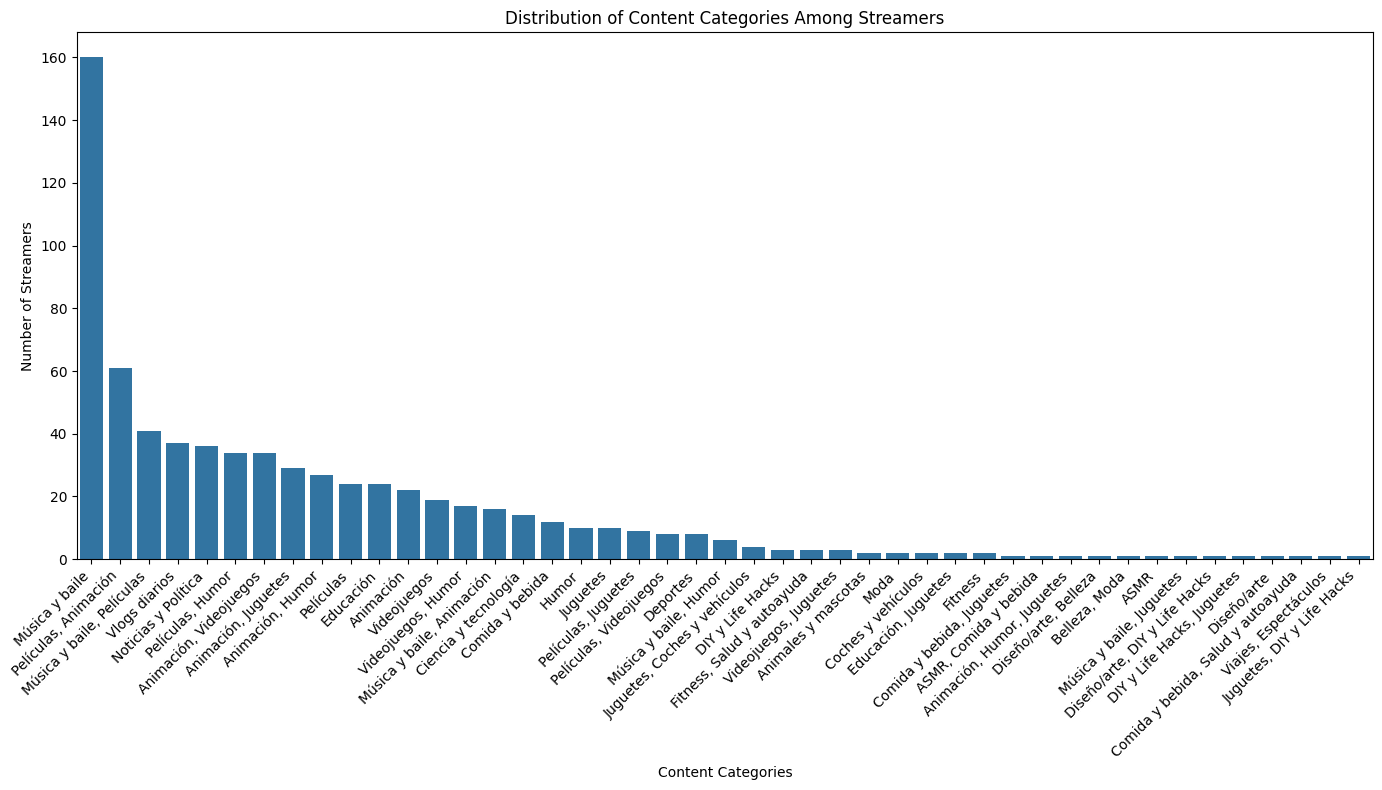

In [13]:
# Distribution of content categories 
plt.figure(figsize=(14, 8))
sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index)
plt.title('Distribution of Content Categories Among Streamers')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

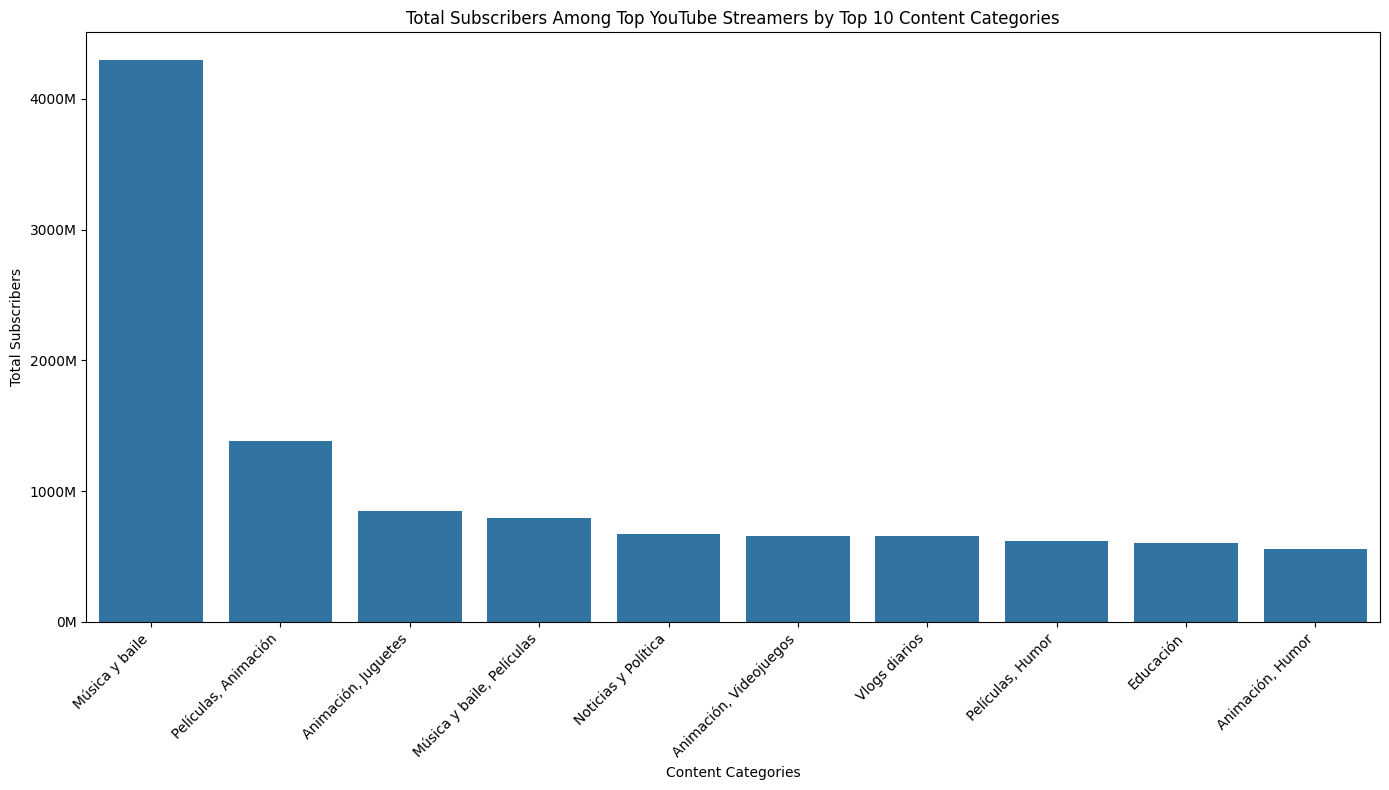

In [14]:
# Top 10 Content categories according to the total subscribers

# Calculate the total subscribers for each content category
total_subscribers_by_category = df.groupby('Categories')['Subscribers'].sum().reset_index()

# Sort the DataFrame by total subscribers in descending order
total_subscribers_by_category = total_subscribers_by_category.sort_values(by='Subscribers', ascending=False)

# Select the top 10 content categories
top_categories = total_subscribers_by_category.head(10)

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Explore the distribution of top 10 content categories based on total subscribers
plt.figure(figsize=(14, 8))
sns.barplot(x='Categories', y='Subscribers', data=top_categories)
plt.title('Total Subscribers Among Top YouTube Streamers by Top 10 Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Total Subscribers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Apply the millions_formatter to the y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

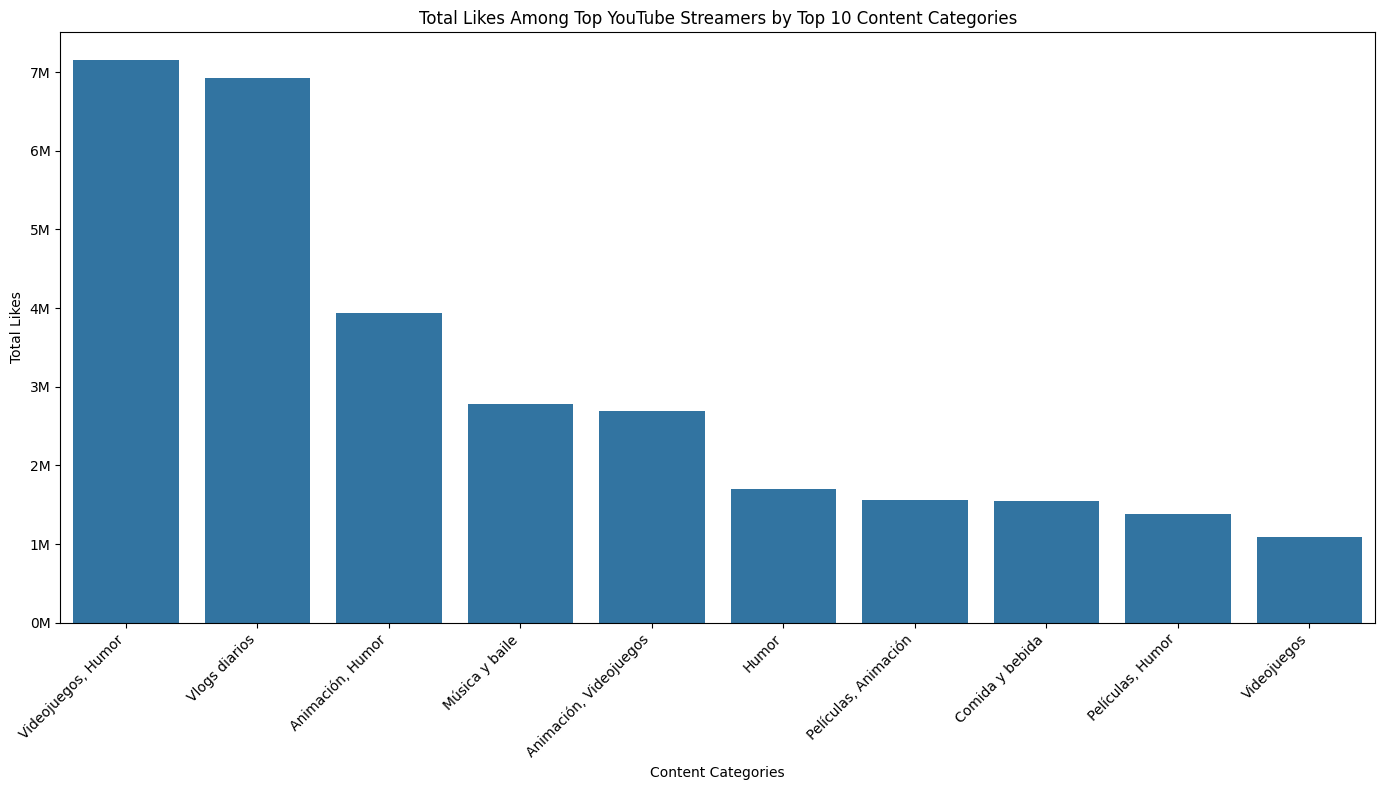

In [15]:
# Top 10 Content categories according to Likes

# Calculate the total likes for each content category
total_likes_by_category = df.groupby('Categories')['Likes'].sum().reset_index()

# Sort the DataFrame by total likes in descending order
total_likes_by_category = total_likes_by_category.sort_values(by='Likes', ascending=False)

# Select the top 10 content categories
top_categories_likes = total_likes_by_category.head(10)

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Explore the distribution of top 10 content categories based on total likes
plt.figure(figsize=(14, 8))
sns.barplot(x='Categories', y='Likes', data=top_categories_likes)
plt.title('Total Likes Among Top YouTube Streamers by Top 10 Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Total Likes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Apply the millions_formatter to the y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

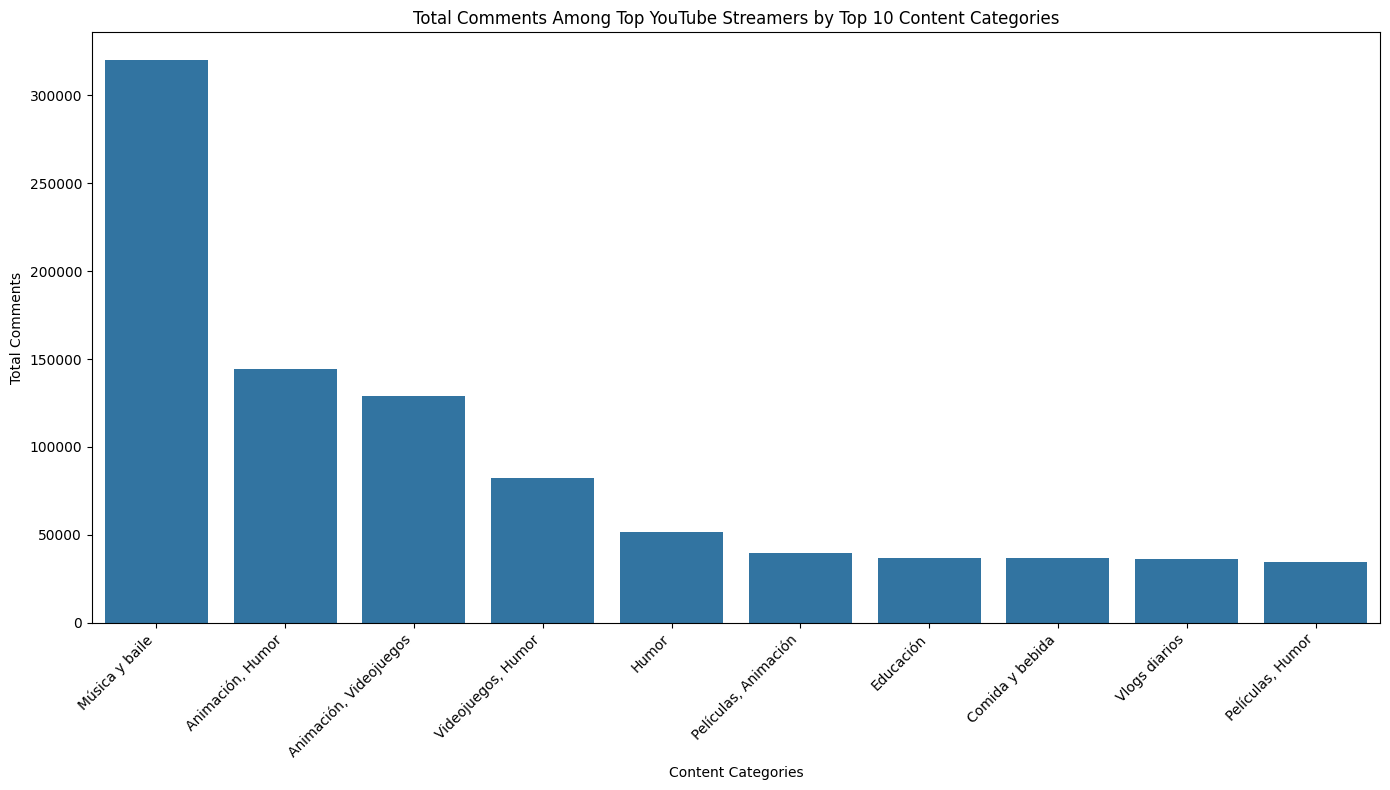

In [16]:
# Top 10 Content categories according to comments

# Calculate the total comments for each content category
total_comments_by_category = df.groupby('Categories')['Comments'].sum().reset_index()

# Sort the DataFrame by total comments in descending order
total_comments_by_category = total_comments_by_category.sort_values(by='Comments', ascending=False)

# Select the top 10 content categories
top_categories_comments = total_comments_by_category.head(10)

# Explore the distribution of top 10 content categories based on total comments
plt.figure(figsize=(14, 8))
sns.barplot(x='Categories', y='Comments', data=top_categories_comments)
plt.title('Total Comments Among Top YouTube Streamers by Top 10 Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Total Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

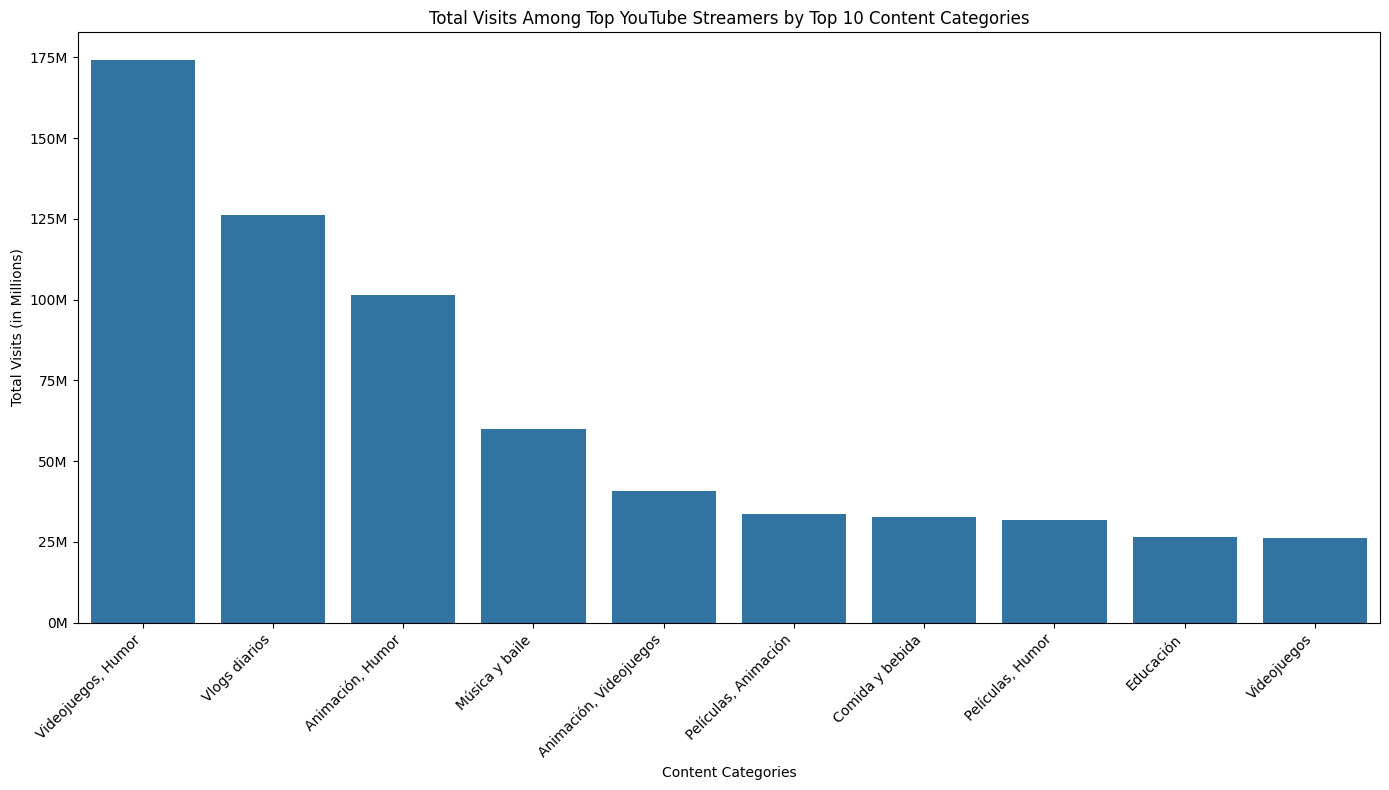

In [22]:
# Top 10 Content categories according to Visits
# Calculate the total visits for each content category
total_visits_by_category = df.groupby('Categories')['Visits'].sum().reset_index()

# Sort the DataFrame by total visits in descending order
total_visits_by_category = total_visits_by_category.sort_values(by='Visits', ascending=False)

# Select the top 10 content categories
top_categories_visits = total_visits_by_category.head(10)

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Explore the distribution of top 10 content categories based on total visits
plt.figure(figsize=(14, 8))
sns.barplot(x='Categories', y='Visits', data=top_categories_visits)
plt.title('Total Visits Among Top YouTube Streamers by Top 10 Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Total Visits (in Millions)')

# Apply the millions_formatter to the y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [18]:
# Streamer with above-average performance in terms of subscribers, Likes, Visits and comments

# Calculate average performance metrics
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

# Identify streamers with above-average performance
above_average_streamers = df[
    (df['Subscribers'] > average_metrics['Subscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments'])
]

# Display the streamers with above-average performance
print("Streamers with Above-Average Performance:")
print(above_average_streamers[['Username', 'Subscribers', 'Visits', 'Likes', 'Comments']])

Streamers with Above-Average Performance:
                  Username  Subscribers       Visits    Likes  Comments
1                  MrBeast    183500000  117400000.0  5300000     18500
5                PewDiePie    111500000    2400000.0   197300      4900
26             dudeperfect     59700000    5300000.0   156500      4200
34             TaylorSwift     54100000    4300000.0   300400     15000
39             JuegaGerman     48600000    2000000.0   117100      3000
43                A4a4a4a4     47300000    9700000.0   330400     22000
58               Mikecrack     43400000    2200000.0   183400      1800
62          KimberlyLoaiza     42100000    5300000.0   271300     16000
64         luisitocomunica     41100000    2500000.0   128900      1800
70             JessNoLimit     39600000    1300000.0    73500      1600
96          TotalGaming093     36300000    1500000.0   129400      4900
98    TechnoGamerzOfficial     35600000    6200000.0   341800     16500
100             markip

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18780\3588187988.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Username', y='Composite_Score', data=top_performers, palette='viridis')


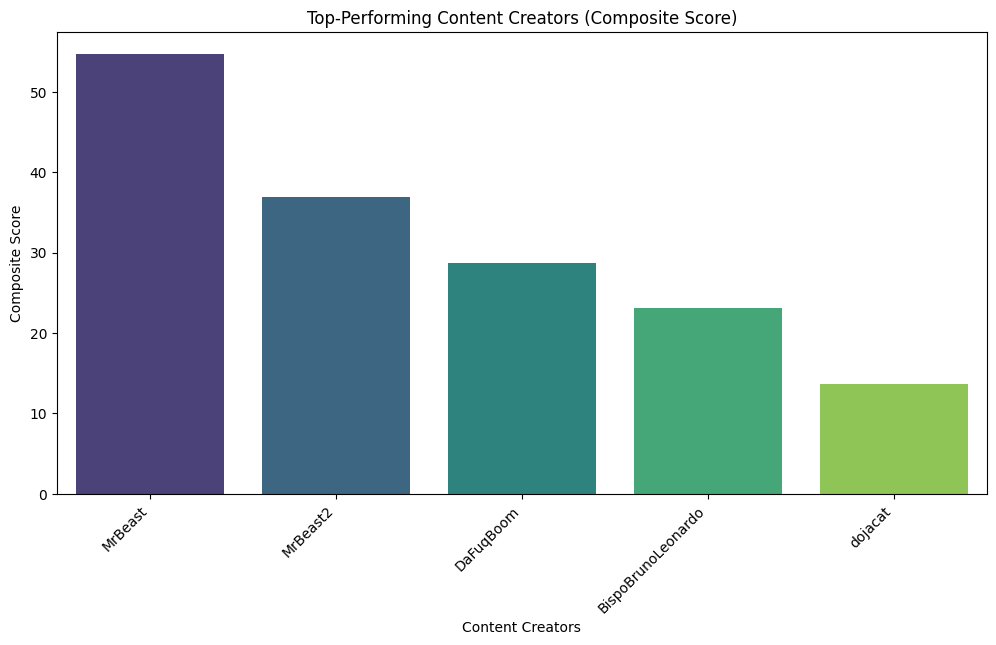

In [19]:
# Identify the top-performing content creators based on all performance metrics

# Calculate Z-scores for each metric
df['Z_Subscribers'] = (df['Subscribers'] - df['Subscribers'].mean()) / df['Subscribers'].std()
df['Z_Visits'] = (df['Visits'] - df['Visits'].mean()) / df['Visits'].std()
df['Z_Likes'] = (df['Likes'] - df['Likes'].mean()) / df['Likes'].std()
df['Z_Comments'] = (df['Comments'] - df['Comments'].mean()) / df['Comments'].std()

# Calculate composite score (sum of Z-scores)
df['Composite_Score'] = df['Z_Subscribers'] + df['Z_Visits'] + df['Z_Likes'] + df['Z_Comments']

# Identify the top-performing content creators based on the composite score
top_performers = df.nlargest(5, 'Composite_Score')

# Create a bar plot for the top-performing content creators
plt.figure(figsize=(12, 6))
sns.barplot(x='Username', y='Composite_Score', data=top_performers, palette='viridis')
plt.title('Top-Performing Content Creators (Composite Score)')
plt.xlabel('Content Creators')
plt.ylabel('Composite Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()